![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/640px-Airbnb_Logo_B%C3%A9lo.svg.png)
# **Uncovering the Airbnb Market Landscape in Bangkok: Data-Driven Insight for Host and Investors**
**`By: Darren`**

# **Business Understanding**
---
## **Business Background**
**`AirBnB`** is a global online platform that connects property owners with those seeking seeking for places to stay. Since its founding in 2008, Aribnb has revolutionized the hospitality industry by allowing everyday property owners to become small business operators. The platform provides a wide varierty of accommodations, from individual rooms to whole homes, catering to different travel preferences and financial plans. Meanwhile, **Bangkok** ranks among **Asia** most frequented cities, attracting millions of **tourist and business visitor** each years. Its hospitality sector has evolved into a mix of traditional hotels and emerging short-term rental properties, making **Bangkok** an **attractive** hub for **Airbnb Host and Investors**. This covergence between global platform dynamic and a fast-growing local tourism market **raises critical question** about market saturation, pricing competitivenes, and host strategy within **Bangkok's Airbnb ecosystem**

## **Problem Statement**
**`Primary Stakeholder`: Airbnb Host** <br>
**`Secondary Stakeholder`: Airbnb Coporate, Airbnb Guests**<br>

**`Business Question:`**<br>
**Which district in Bangkok offers the most viable and profitable opportunity for a new Airbnb investment, balacing potential returns with manageable risk?**

# **Libaries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import missingno as msno
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) 
pd.set_option('display.float_format', '{:.2f}'.format)

# **Importing Dataset** 

In [3]:
df=pd.read_csv('D:/Project/Capstone/Airbnb Listings Bangkok.csv')
df.head(5)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.76,100.54,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.79,100.57,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,NaN,NaN,3,365,0


# **Data**

## **Dataset Information**

| Features | Description | 
| :--- | :---| 
| Id|Airbnb's unique identifier for the listing.| 
|Name| Name of the listing.| 
|Host_id| Airbnb's unique identifier for the host/user.| 
|Host_name| Name of the host. Usually, just the first name(s).| 
| Neighborhood| The neighborhood is geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.| 
| Latitude| Uses the World Geodetic System (WGS84) projection for latitude and longitude.| 
| Longitude| Uses the World Geodetic System (WGS84) projection forlatitude and longitude..| 
| Price| Daily price in local currency. Note, the $ sign may be used despite the locale.| 
| Minimum_nights| The minimum number of night stays for the listing (calendar rules may differ).| 
| Number_of_reviews| The number of reviews the listing has.| 
| Last_review| The date of the last/newest review.| 
| Calculated_host_listings_count| The number of listings the host has in the current scrape in the city/region geography.| 
| avaliability_365| The availability of thelisting x days in the future. Note a listing may be unavailable because it has been booked by a guest or blocked by the host.| 
| Number_of_reviews_ltm| The number of reviews the listing has (in the last 12 months).| 

### **Room Types Overview**
| Room Types | Description | 
| :--- | :---| 
| Entire place|Entire places are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: "Host occupies the first floor of the home") and provide further details on the listing.| 
|Private rooms| Private rooms are great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your private room for sleeping and may share some spaces with others. You might need to walk through indoor spaces that another host or guest may occupy to get to your room.| 
| Shared rooms|Shared rooms are for when you don't mind sharing a space with others. When you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people. Shared rooms are popular among flexible travelers looking for new friends and budget-friendly stays.| 
|Hotel| A Hotel| 

## **Data Overview**
**Before we dive into the analysis, let's start by taking a look at the Data overview. this will help us  understand its structure and any issues that can be fixed. For instance we'll be checking the following:**
- Duplicate Data: Is there any Duplication?
- Data Types: What kind of data is in each column?
- What is the timeframe of the dataset?
- Missing Values: Are there any missing entries in the data?
- Unique Values(Nunique): How many different values are in each column?
- Data Description: A quick summary of the numerical and categorical data, like mean, min, and max.

,datatypes,missing_value,mv_%,nunique,unique
Unnamed: 0,int64,0,0.00,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
id,int64,0,0.00,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
name,object,8,0.05,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station,

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.00,15854.00,15854.00,15854.00,15854.00,15854.00,15854.00,15854.00,10064.00,15854.00,15854.00,15854.00
mean,7926.50,157939679701701248.00,154105783.58,13.75,100.56,3217.70,15.29,16.65,0.81,13.89,244.38,3.48
std,4576.80,294601541771321664.00,131872648.11,0.04,0.05,24972.12,50.82,40.61,1.09,30.27,125.84,8.92
min,0.00,27934.00,58920.00,13.53,100.33,0.00,1.00,0.00,0.01,1.00,0.00,0.00
25%,3963.25,21045091.50,39744308.00,13.72,100.53,900.00,1.00,0.00,0.12,1.00,138.00,0.00
50%,7926.50,35037340.00,122455569.00,13.74,100.56,1429.00,1.00,2.00,0.43,4.00,309.00,0.00
75%,11889.75,52561542.25,239054687.50,13.76,100.59,2429.00,7.00,13.00,1.06,13.00,360.00,3.00
max,15853.00,790816217344482048.00,492665929.00,13.95,100.92,1100000.00,1125.00,1224.00,19.13,228.00,365.00,325.00


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


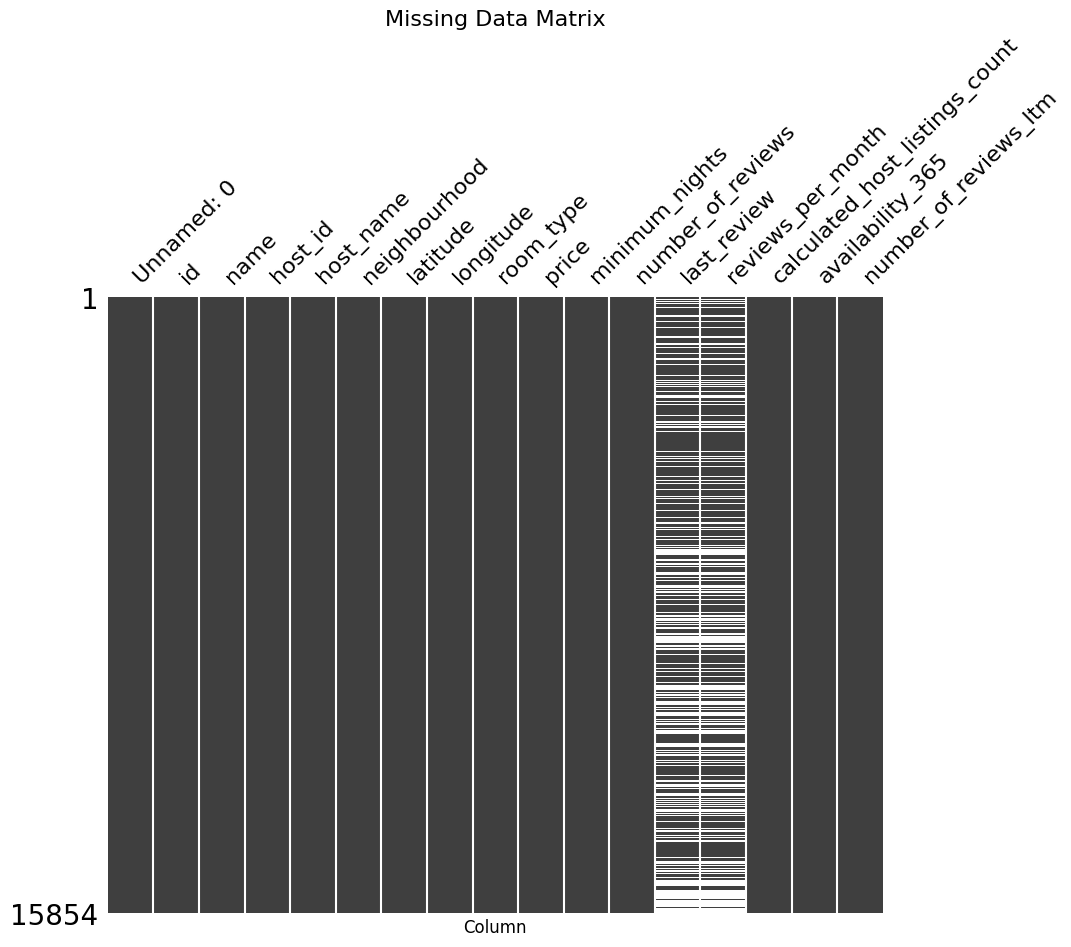

In [4]:
pd.set_option('display.max_colwidth', None) 
checking=pd.DataFrame({
    'datatypes': df.dtypes,
    'missing_value': df.isnull().sum(),
    'mv_%': (df.isna().sum()*100/len(df)),
    'nunique': df.nunique(),
    'unique': df.apply(lambda x: x.unique())   
})
display(checking,df.describe(),df.describe(include='object').round(3))
msno.matrix(df, figsize=(10, 8), sparkline=False)
plt.title('Missing Data Matrix', fontsize=16)
plt.xlabel('Column', fontsize=12)
plt.show()

## **Data Quality And Observations**
Based on the initial observations, we have identified several data quality issues. Before proceeding with our **Analysis**, we will address the following issues:
- The undentified **Unamed: 0** columns appears to be just an index column
- **Missing value:**
    - The **Name** column has 8 missing entries, and the **Host_name** column has 1 missing entry.
    - Both the **Last_review** and **review_per_month** column are missing 5790 values. Which suggest that a substantial 36,52% of the listing have not received any reviews
    - The missingno matrix also suggest that the **Last_review** and **review_per_month** column data is `Missing not at random (MNAR)`
- Data Type Inconsistency: the **Last_review** column is currently stored as an Object
- **Price and Minimum_night:**
    - The **Price** column includes an entries with a value of **0**, which is **not possible** since a listing needs to have price. Additionally, the maximum price of **11,000,000 BAHT** represent a very high-value or luxurious listing (IDR 561,722,370/night or USD 33,853.46/night)
    - The **Minimum_night** column has a maximum values of **1125 days**, which is approximately to aprroximately 3 years and 1 month, indicating a **long-term rental** or a potential **data entry error**. Additionally, the **Minimum_night** has a minimum value of **0**, indicating there are some listing that can't be book for the next 365 days
- The **Availability_365** column has a minimum values of **0**, indicating that a number of listing have **no availability for booking throughout the year**



**Duplication check**
Now let's check for `duplication` in the dataset


In [5]:
df[df.duplicated()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


 **no duplicated data** found in the dataset. This confirm each listing entry is unique.

**Drop and Rename** <br>
The `unnamed: 0` column which is index column will be drop. The `neighbhourhood`  column will aslo be renamed to `district`, since accoridng to wikipedia, `Bangkok` is administratively divided into district (known as *`khet`*).

In [6]:
pd.reset_option('all')
pd.set_option('display.float_format', '{:.2f}'.format)
df.drop(columns=['Unnamed: 0'],inplace=True)
df=df.rename(columns={'neighbourhood': 'district'})

**Data Timeframe**<br>
Now let's identify the time coverage of the dataset, by coverting the `last_review` column to datetime foramt. which should allow us to check `the oldest` and `most recent` review and help us understand the `time period our analysis covers`.

In [7]:
df['last_review']=pd.to_datetime(df['last_review'])
oldest=df['last_review'].min()
latest=df['last_review'].max()
print(f'Oldest Date: {oldest}')
print(f'Latest Date: {latest}')

Oldest Date: 2012-12-15 00:00:00
Latest Date: 2022-12-28 00:00:00


<div class="alert alert-block alert-warning">
<b>Warning:</b> The Analysis and insight will heavily based on historical data from December 2012 to December 2022</div>
<b>
Therefore, the analysis and insight presented do not account for post-2022 market shifts, such as the post COVID-19 and subsequent regulatory changes, which may lead to different outcomes in the current market (2025)

**Missing Values: Name**
<br>
Now let's address the 8 missing entries in the `name` column

In [8]:
missing_name=df[df['name'].isnull()]
missing_name

,id,name,host_id,host_name,district,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69,100.60,Private room,1080,5,0,NaT,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.78,100.57,Private room,1200,1,0,NaT,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78,100.50,Private room,1200,1,0,NaT,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68,100.61,Entire home/apt,2424,2,0,NaT,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74,100.56,Private room,5000,3,0,NaT,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75,100.53,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.72,100.60,Private room,1000,1,0,NaT,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.73,100.56,Private room,850,1,2,2017-12-11,0.03,3,220,0


This missing value in column `Name` is likely due to data entry error, since two of them has been reviewed. Therefore it would be best to fill them with placeholder value of `"room_type" in "district"`, since column `name`  has no impact for analysis purposes.

In [9]:
mask=df['name'].isna()
df.loc[mask,'name']=df['room_type']+' in '+df['district']
display(df.loc[missing_name.index],df[df['name'].isnull()])

,id,name,host_id,host_name,district,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,Private room in Phra Khanong,18852579,Titawan,Phra Khanong,13.69,100.60,Private room,1080,5,0,NaT,NaN,1,365,0
544,4720818,Private room in Din Daeng,24386225,Cherry,Din Daeng,13.78,100.57,Private room,1200,1,0,NaT,NaN,1,365,0
572,4245018,Private room in Bang Phlat,22030043,Parichart,Bang Phlat,13.78,100.50,Private room,1200,1,0,NaT,NaN,1,365,0
669,6148415,Entire home/apt in Bang Na,31895202,Chira,Bang Na,13.68,100.61,Entire home/apt,2424,2,0,NaT,NaN,1,365,0
1030,8055144,Private room in Vadhana,42521288,Nantida,Vadhana,13.74,100.56,Private room,5000,3,0,NaT,NaN,1,365,0
1282,10000742,Private room in Ratchathewi,51374914,Diamond Bangkok,Ratchathewi,13.75,100.53,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,Private room in Vadhana,55347997,Khaneungnit,Vadhana,13.72,100.60,Private room,1000,1,0,NaT,NaN,1,365,0
2075,13142743,Private room in Khlong Toei,73275200,Pakaphol,Khlong Toei,13.73,100.56,Private room,850,1,2,2017-12-11,0.03,3,220,0


,id,name,host_id,host_name,district,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


**Missing Value: Host_name**
<br>
Now let's investigate the single listing with a `missing host_name` to check if the host has other listing.

In [10]:
df[df['host_name'].isnull()]

,id,name,host_id,host_name,district,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.77,100.64,Private room,1399,3,1,2017-07-29,0.02,1,365,0


The investigation shows that from the `calculated_host_listings_count` column, the host no other listing in our dataset. From a `business perspective` it doesn't make sense, since every legitimate Airbnb must have an associated host. Therefore we should drop the listing with a `missing host_name`.

In [11]:
df=df.dropna(subset=['host_name'])
df[df['host_name'].isnull()]

,id,name,host_id,host_name,district,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


**Missing Value: Last_Review and review_per_month**
<br>
The missingno matrix indicates that the `missing value` in `Last_Review` and `review_per_month` are not random. Let's check  which column this pattern correlates with.

In [12]:
display(df[df['last_review'].isnull()],df[df['reviews_per_month'].isnull()])

,id,name,host_id,host_name,district,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaT,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,NaT,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.83,100.57,Entire home/apt,1461,1,0,NaT,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.72,100.57,Entire home/apt,1400,30,0,NaT,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.72,100.65,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0


,id,name,host_id,host_name,district,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaT,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,NaT,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.83,100.57,Entire home/apt,1461,1,0,NaT,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.72,100.57,Entire home/apt,1400,30,0,NaT,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.72,100.65,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0


If we look at the output, Its seems all the row with missing value of **last_review** and **review_per_month** has **0 value** in **number_of_review** column. Now let's check if that is the case?

In [13]:
df[(df['number_of_reviews']==0) & (df['last_review'].isnull()) & (df['reviews_per_month'].isnull())]

,id,name,host_id,host_name,district,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.67,100.62,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75,100.62,Private room,800,60,0,NaT,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.77,100.63,Private room,1905,1,0,NaT,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.83,100.57,Entire home/apt,1461,1,0,NaT,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.72,100.57,Entire home/apt,1400,30,0,NaT,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.72,100.65,Private room,2298,28,0,NaT,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1429,1,0,NaT,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.75,100.54,Private room,1214,1,0,NaT,NaN,14,365,0


Well it seems that's the case since the number of rows stay at **`5790`**. so we can conclude that last_review and reviews_per_month columns are `missing` when `number_of_reviews column is 0`. From a business perspective, let's fill all the missing value with  `0` for `reviews_per_month` column and leave it `NaN` for the `last_review` column, as there is `no last review date` for listings that have `never been reviewed`

In [14]:
df['reviews_per_month'].fillna('0',inplace=True)

**Price: 0**
<br>
now let's check for any listing with a price of `0`, which represent an invalid data, since Airbnb does not allow listings with no price

In [15]:
df[df['price']==0]

,id,name,host_id,host_name,district,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.74,100.56,Hotel room,0,1,0,NaT,0,1,0,0


Only one listing was found with 0 price. Since `Airbnb` does not allow a listing with 0 price, we'll remove this invalid listing.

In [16]:
df.drop(index=11103, inplace=True)
df[df['price']==0]

,id,name,host_id,host_name,district,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


**Minimum_Nights**
<br>
![alt text](Maxnight.jpg)
<br>
Based on a **`Fake listings`** i did on **`AirBnB`**, the platform only allows host to set a  `maximum_night` is `730`. This means all listing with minimum_nights value over 730 isn't a valid listing. Hence, we'll drop these listing since they don't comply with **`Airbnb business policy`**.

In [17]:
maxnight=df[df['minimum_nights']>=730]
df=df.drop(maxnight.index)

**Minimum_Night: 0**<br>
Now let's examine  on how many listings has the `minimum_night` set to 0, as this means the listing `can't be  booked` for the next 365 days

In [18]:
len(df[df['availability_365']==0])

855

Its seems there are `856 listing` with a `minimum_night` set to `0`. For now we'll keep this finding and address it later on.

**Number_of_reviews: 0**<br>
Now let's examine  on how many listings have `never received` a `review` which could indicate `new`, `unpopular` or `inactive listings`.

In [19]:
display(len(df[df['number_of_reviews']==0]),len(df[df['number_of_reviews']==0])/len(df))



5785

0.36509940044177974

`5786` listing (`36,5%` of the dataset) have `zero reviews`. From a business perspective, these could represent: 
- `New listings` that haven't had time to accumulate reviews
- `Unpopular listings` with poor visibility or booking coversion
- `Inactive listings` that are no longer being marketed

In [20]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15845.00,15845.00,15845.00,15845.00,15845.00,15845.00,15845.00,10060,15845.00,15845.00,15845.00
mean,158029389838465312.00,154113442.79,13.75,100.56,3215.81,14.84,16.64,2021-08-30 12:29:20.636182784,13.90,244.40,3.48
min,27934.00,58920.00,13.53,100.33,278.00,1.00,0.00,2012-12-15 00:00:00,1.00,0.00,0.00
25%,21045093.00,39744308.00,13.72,100.53,900.00,1.00,0.00,2020-02-20 00:00:00,1.00,138.00,0.00
50%,35032034.00,122455569.00,13.74,100.56,1429.00,1.00,2.00,2022-10-24 00:00:00,4.00,309.00,0.00
75%,52587795.00,239063794.00,13.76,100.59,2429.00,7.00,13.00,2022-12-08 00:00:00,13.00,360.00,3.00
max,790816217344482048.00,492665929.00,13.95,100.92,1100000.00,700.00,1224.00,2022-12-28 00:00:00,228.00,365.00,325.00
std,294661145674900800.00,131874670.82,0.04,0.05,24977.72,45.95,40.56,NaN,30.28,125.83,8.92


,name,host_name,district,room_type,reviews_per_month
count,15845,15845,15845,15845,15845
unique,14792,5309,50,4,514
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,0
freq,45,228,2151,8907,5785


## **Key Insight from Data Overview**
- The host `Curry` dominates the market with `228 properties`, indicating `professional host` operations
- `Vadhana` is the most saturated district with `2152 Listings`
- `Entire Home/Apt` represent the majority of the market (`8912 listings`), showing strong consumer preference for `private accomodation`
-  `855 Listing` shows 0 annual Availability, suggesting either a new listing dead listings or hosts not actively pursuing bookings
- `5786 Listings` have zero reviews representing either new listing or  potetially struggling properties.
- There are `5309`unique host in the dataset.
- `Data quality issues: succesfuly addressed`
    - Removed 1 invalid listing with no `host_name`
    - Removed 1 invalid listing with `0 price`
    - Removed listings exceeding `Airbnb maximum 730 night policy`
    - Filled 8 missing name with placeholder text `(room type in district)`
    - Handled 5790 missing `review_per_month column`


# **Data Analysis**

We begin our analysis by examining the `distribution`  and `potential outliers` of critical business metrics to understand the fundamental characteristics of `Bangkok Airbnb market`

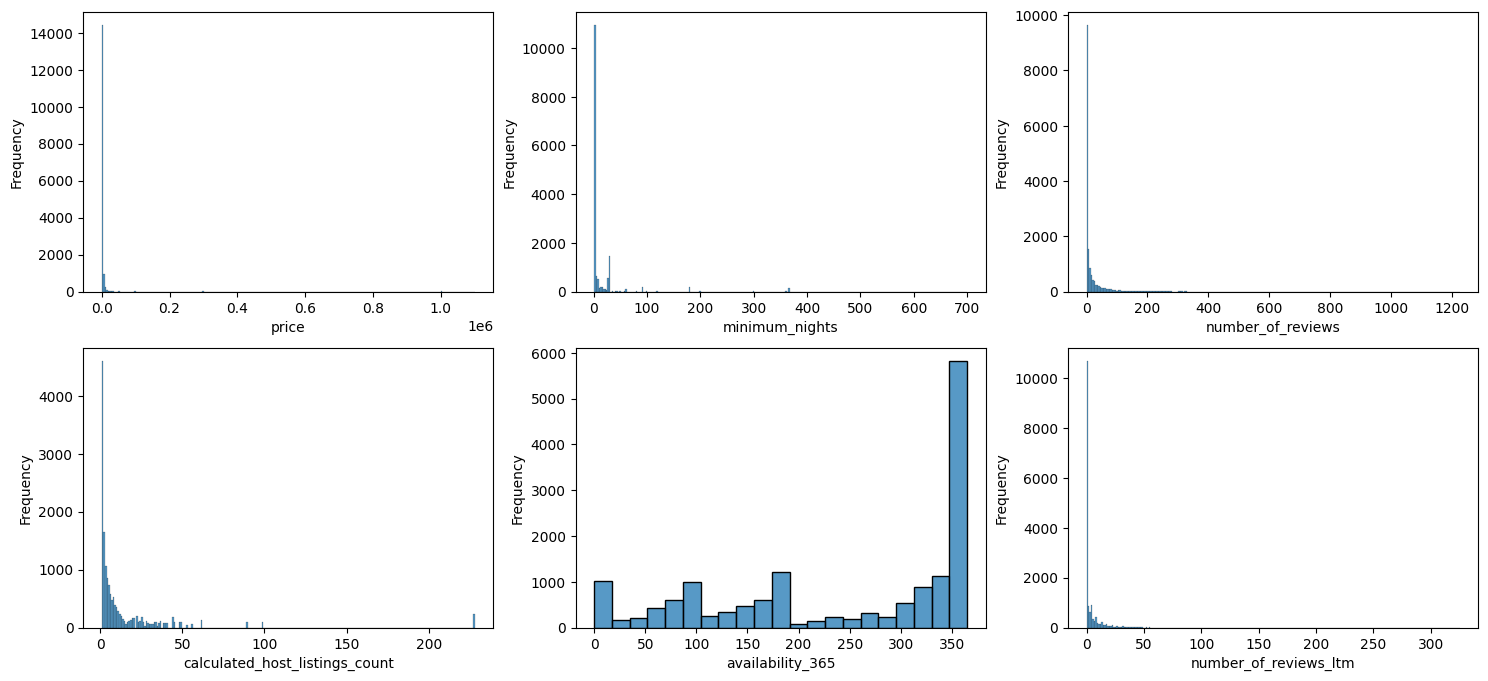

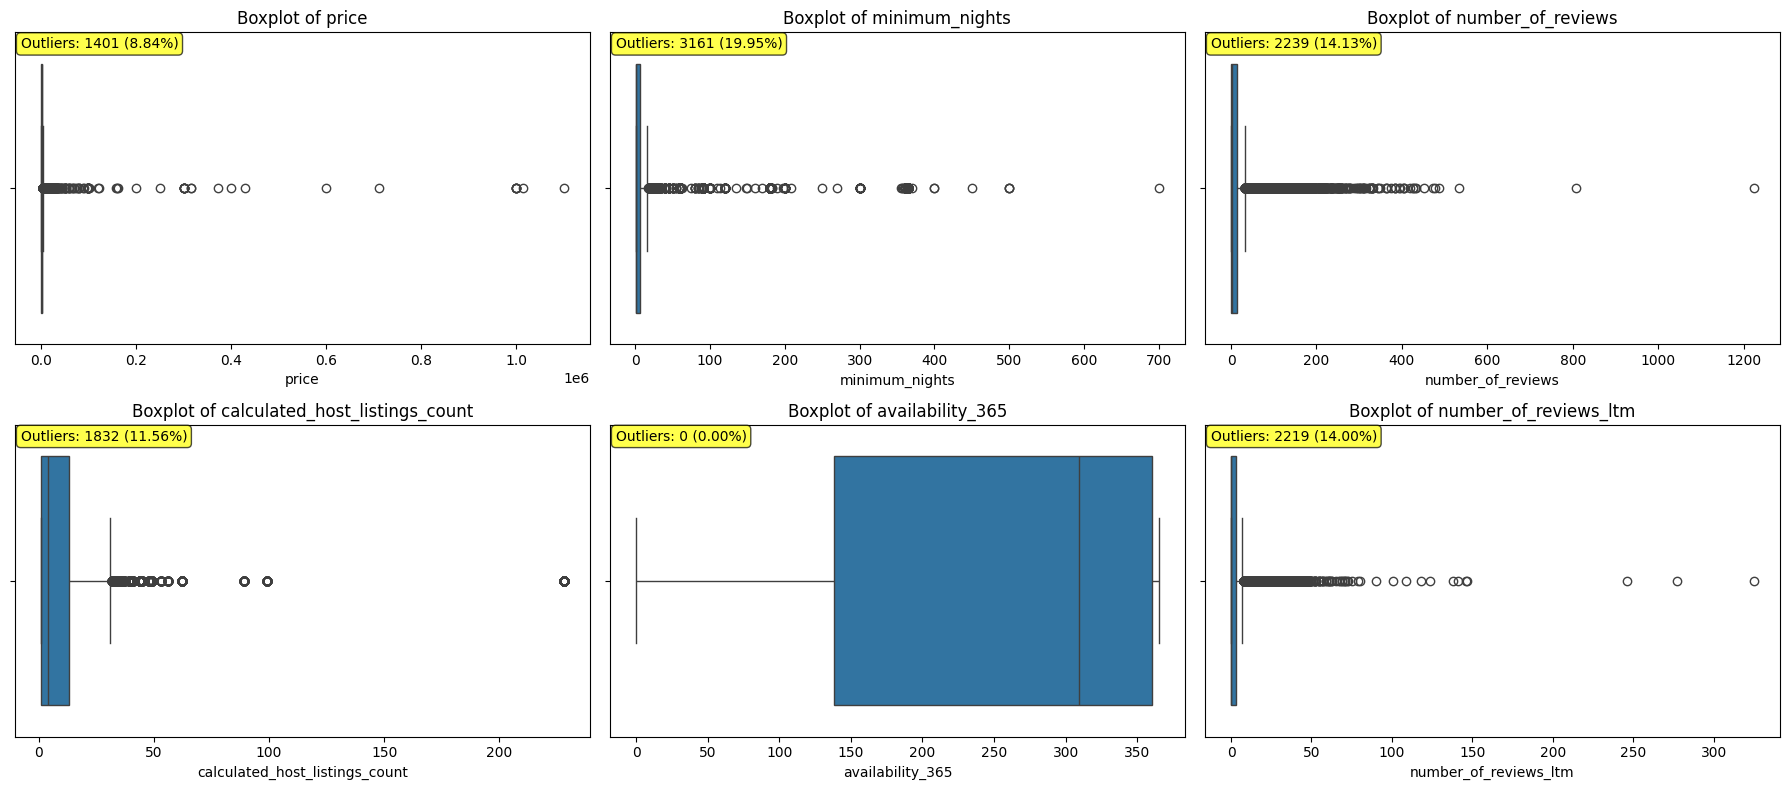

,DAgostino_Pvalue,Distribution,skewness,kurtosis,Lower Bound,Upper Bound,outliers,outliers %,Min,Max
price,0.00,Not Normal,33.88,1288.91,-1393.50,4722.50,1401,8.84,278,1100000
minimum_nights,0.00,Not Normal,6.11,42.54,-8.00,16.00,3161,19.95,1,700
number_of_reviews,0.00,Not Normal,6.27,84.00,-19.50,32.50,2239,14.13,0,1224
calculated_host_listings_count,0.00,Not Normal,5.38,33.73,-17.00,31.00,1832,11.56,1,228
availability_365,0.00,Not Normal,-0.58,-1.18,-195.00,693.00,0,0.00,0,365
number_of_reviews_ltm,0.00,Not Normal,9.72,225.83,-4.50,7.50,2219,14.00,0,325


In [21]:
num_col = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
nrow = math.ceil(len(num_col)/3)
output={}
#Histplot and Stats
plt.figure(figsize=(18, 4*nrow))
for i, col in enumerate(num_col):
    plt.subplot(nrow,3,i+1)
    sns.histplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')

    #statistical test for normality
    normality=stats.normaltest(df[col])
    normality_p=normality.pvalue
    skewness=stats.skew(df[col])
    kurtosis=stats.kurtosis(df[col])

    if normality_p < 0.05:
        distribution='Not Normal'
    elif normality_p > 0.05:
        distribution='Normal'
    else:
        distribution='Error'

    #outliers
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    outliers=df[(df[col] <lower_bound)|(df[col] > upper_bound)]
    outliers_percentage=(len(outliers)/len(df)*100)
    value_min=df[col].min()
    value_max=df[col].max()
    output[col] = {
        'DAgostino_Pvalue': normality_p,
        'Distribution': distribution,
        'skewness':skewness,
        'kurtosis':kurtosis,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'outliers':len(outliers),
        'outliers %': f'{outliers_percentage:.2f}',
        'Min': value_min,
        'Max': value_max
    }

#Boxplot
plt.figure(figsize=(18, 4*nrow))
for i, col in enumerate(num_col):
    plt.subplot(nrow, 3, i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title(f'Boxplot of {col}')
    
    #outliers annotation
    outliers_count = output[col]['outliers']
    outliers_pct = output[col]['outliers %']
    plt.annotate(f'Outliers: {outliers_count} ({outliers_pct}%)', 
                xy=(0.01, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
plt.tight_layout()
plt.show()
outputframe=pd.DataFrame(output).T
display(outputframe)

## **Distribution & Outliers Summary**

The examination reveals a highly segemented market withnone of the critical business metric follows a normal distribution. Hence, the common statistical concept of an `"average"` will not represent most listings. The examination also show signifiacant outliers:
- `Price`: 1,401 listings (8.84%) has extreme value
- `Minimum_night`: 3,161 (19.95%) has a long-stay requirement
- `Review & Activity`: ~2,200 listings (14%) has exceptional engagement
- `Host Listings`: 1,832 Host has mutiple listings

These outlier indicates there are some very luxury properties, long-term rentals, professional host, and highly popular listings.


## **Feature Engineering**
<div class="alert alert-block alert-warning">
<b>Warning:</b> All The Analysis below will heavily depending on the category created
</div>

**1. Popularity Categorization (`class_popularity`)** 
- `Unreviewed` → 0 Reviews
- `Booked` → 1-32 Reviews
- `Popular` → >32 Reviews

**Justification:**
The upper threshold of **32 Reviews** represent the top 25%. This should quickly helps on identifyting which listing are proven and popular with guest, and which are new and might need help.

**2. Stay_category (`class_stay`)** 
- `Short-term` → 1-7 Night
- `Medium-term` → 8-28 Night
- `Long-term` → 28+ Night

**Justification:**
The classification should help distinguishing listing by traveler type and stay intent

**3. `Potential Annual Revenue`**<br>
**Formula**: price x (365- Availability 365)
<br>
**Justification:** 
This gives a simple, realistic estimate on how much money a listing could make in a year

**4. `Occupancy_rate`**<br>
**Formula**: (365- Availability 365)/365 <br>
**Justification:** 
This gives a simple, realistic estimate on how much money a listing could make in a year


**Host type (`host_category`)**
- `Individual` → 1 Listing
- `Small Business` → 2-5 Listing
- `Professional` → 6-20 Listing
- `Enterprise` → 20+ Listing
**Justification:** 
This gives a simple, realistic estimate on how much money a listing could make in a year

In [22]:
def class_popularity(rev):
    if rev ==0:
        return 'Unreviewed'
    elif rev <=32:
        return 'Booked'
    else: 
        return 'Popular'

def class_stay(sty):
    if sty <= 7:
        return 'short-term'
    elif sty <28:
        return 'medium-term'
    else :
        return 'long-term'

def class_host(hst):
    if hst == 1:
        return 'Individual'
    elif (hst >1) and (hst <=5):
        return'Small Business'
    elif (hst >5) and (hst <=20):
        return 'Profesional'
    else:
        return 'Entreprise'
df['stay_category']= df['minimum_nights'].apply(class_stay)
df['popularity'] = df["number_of_reviews"].apply(class_popularity)
df['occupancy_rate']= (365-df['availability_365'])/365
df['PAR']= df['price']*(365 - df['availability_365'])
df['host_category']= df['calculated_host_listings_count'].apply(class_host)
df.shape

(15845, 21)

## **Actual Market Size and Risk Assesment Analysis**
To analyze the actual market size and risk assesment, we will utilize three key metrics: `Availability_365, number_of_reviews, and number_of_reviews_ltm`. By combining current availability with historical and recent review data, we can distringuish between truly active listing and inactive ones, providing a realitis view of market health

Each listing will be categorize based on their current status and performance:
**Listings Status**
- **Dead Listings** — inactive or abandoned (no availability, no reviews).  
- **Blocked Listings** — unavailable but historically active (booked or host-blocked).  
- **Available but Unreviewed** — newly listed or underperforming supply.  
- **Healthy Listings** — active and reviewed, representing the *true functional market size*.

For healthy listings, we further analyze their performance by calculating the percentage of reviews received in the last year:
- **Trending Up** → Majority of reviews came in the last 12 months (70%+ recent activity).  
- **Stable** → Moderate sustained performance (30–70% recent reviews).  
- **Declining** → Low recent review share (<30%), signaling weakening demand.

<div class="alert alert-block alert-info">
<b>HOWEVER:</b> This analysis has limitations as it cannot distinguish between voluntarily blocked listings and those removed by regulatory actions, and the review-based momentum assessment may not fully capture very recent market shifts..
</div>

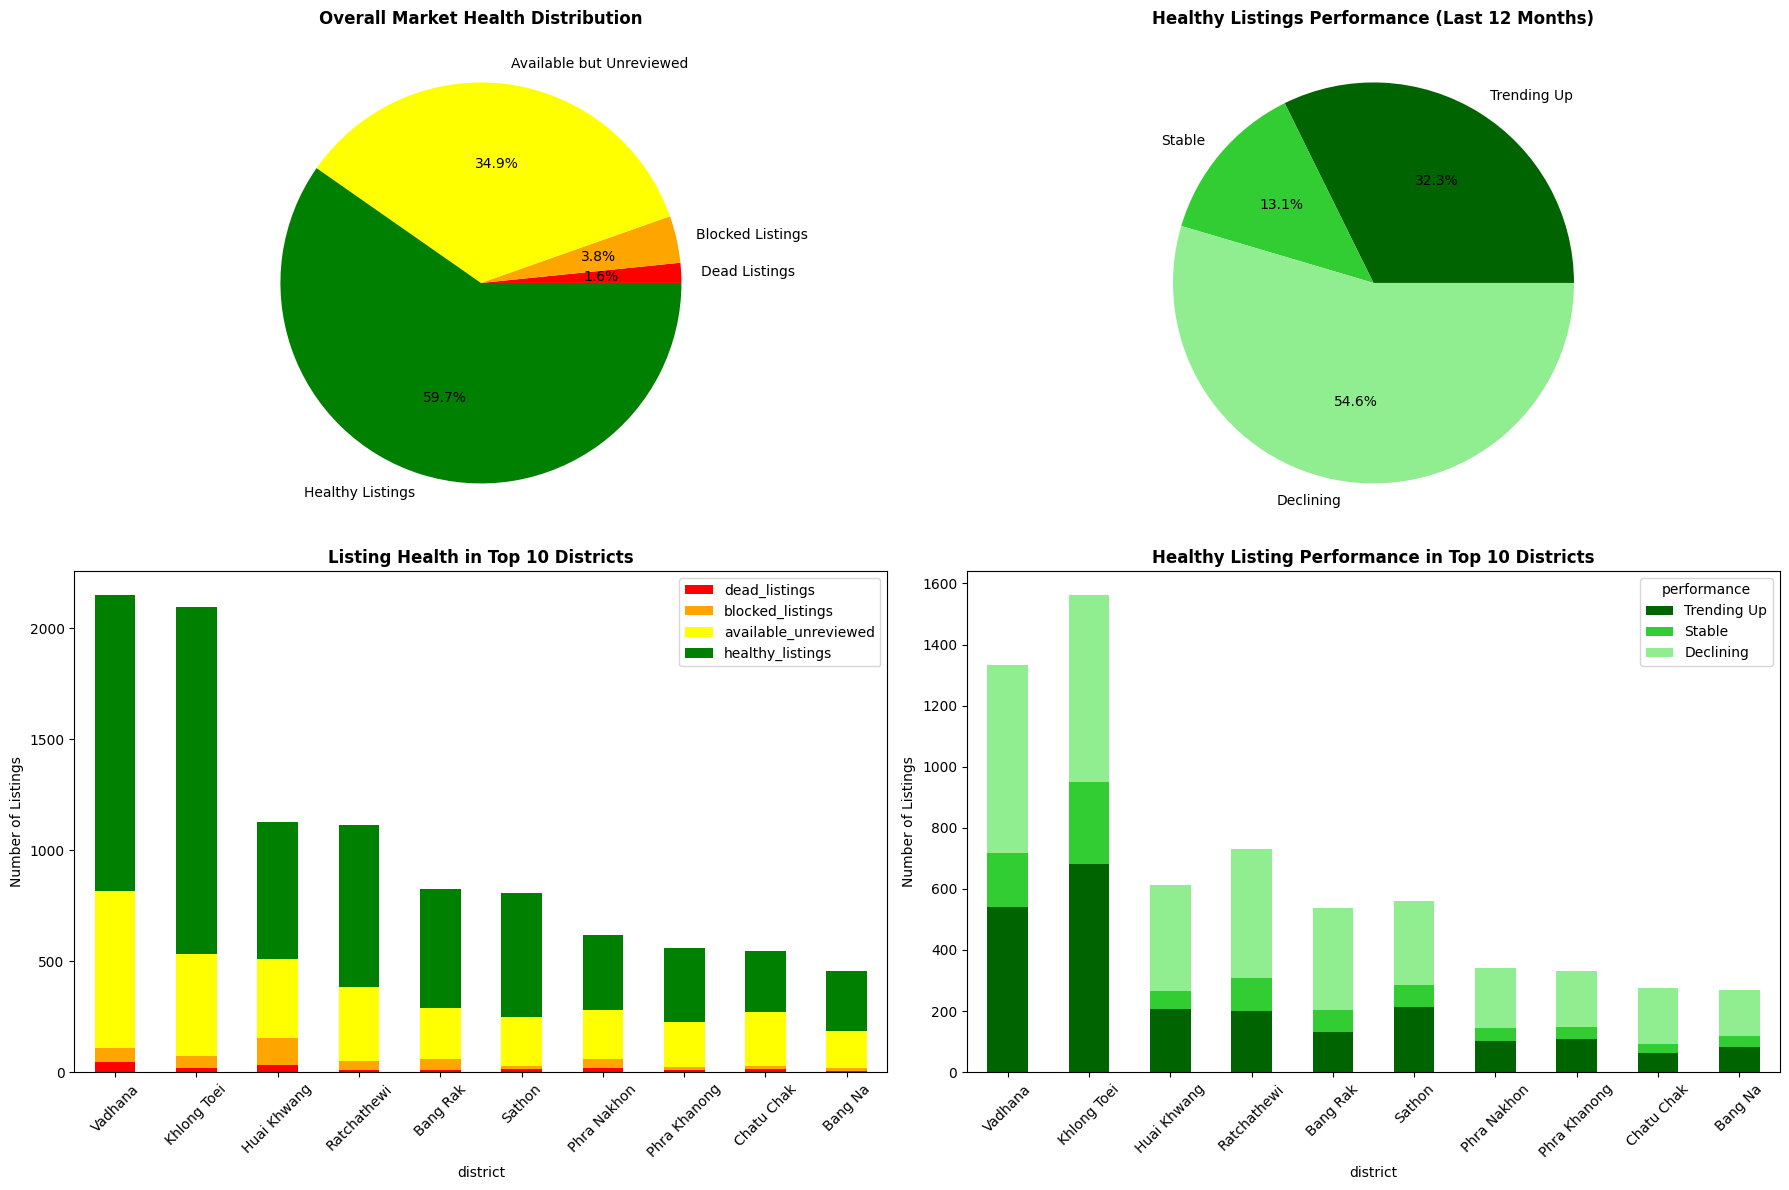


Market Size
1. Only 9460 (59.7%) of listings are considered 'healthy' (available + reviewed)
2. 5530 listings (34.9%) are available but unreviewed
3. 255 listings (1.6%) are completely abandoned

Healthy Listing Performance
Trending Up: 3,056 (32.3% of healthy)
Stable: 1,240 (13.1% of healthy)
Declining: 5,164 (54.6% of healthy)

Healthiest District:


,total_listings,healthy_listings,healthy_listings_ratio
district,,,
Khlong Toei,2097,1563,0.74
Sathon,808,559,0.69
Phaya Thai,422,291,0.69
Ratchathewi,1114,730,0.66
Parthum Wan,454,297,0.65
Bang Rak,827,536,0.65
Bang Kho laen,140,88,0.63
Vadhana,2151,1333,0.62
Bang Sue,249,153,0.61



Worst Performing District:


,total_listings,healthy_listings,healthy_listings_ratio
district,,,
Thung khru,23,4,0.17
Khlong Sam Wa,32,6,0.19
Sai Mai,40,8,0.20
Taling Chan,50,13,0.26
Wang Thong Lang,100,27,0.27



Best Performance District:


performance,Trending Up,Stable,Declining,total_healthy_listings,Trending Up_ratio,Stable_ratio,Declining_ratio
district,,,,,,,
Khlong Toei,683.00,267.00,613.00,1563.00,0.44,0.17,0.39
Vadhana,542.00,174.00,617.00,1333.00,0.41,0.13,0.46
Sathon,213.00,71.00,275.00,559.00,0.38,0.13,0.49
Huai Khwang,206.00,61.00,347.00,614.00,0.34,0.10,0.56
Ratchathewi,200.00,107.00,423.00,730.00,0.27,0.15,0.58


In [30]:
def market_health(row):
    availability=row['availability_365']
    total_reviews=row['number_of_reviews']
    recent_reviews=row['number_of_reviews_ltm']
    
    if availability==0 and total_reviews==0:
        base_category='Dead Listings'
    elif availability==0 and total_reviews>0:
        base_category='Blocked Listings'  
    elif availability>0 and total_reviews==0:
        base_category='Available but Unreviewed'
    elif availability>0 and total_reviews>0:
        base_category='Healthy Listings'
    else:
        base_category='Unknown'

    performance=None
    if base_category=='Healthy Listings':
        if recent_reviews==0:
            performance='Declining'
        elif recent_reviews>=total_reviews*0.7:  
            performance='Trending Up'
        elif recent_reviews>=total_reviews*0.3:
            performance='Stable'
        else:
            performance='Declining'
    
    return base_category,performance

label_health=['Dead Listings','Blocked Listings','Available but Unreviewed','Healthy Listings']
label_perform=['Trending Up','Stable','Declining']

df[['market_health','performance']]=df.apply(lambda row:pd.Series(market_health(row)),axis=1)

health_summary=pd.concat([
    df.groupby('district').size().rename('total_listings'),
    df[df['market_health']=='Dead Listings'].groupby('district').size().rename('dead_listings'),
    df[df['market_health']=='Blocked Listings'].groupby('district').size().rename('blocked_listings'),
    df[df['market_health']=='Available but Unreviewed'].groupby('district').size().rename('available_unreviewed'),
    df[df['market_health']=='Healthy Listings'].groupby('district').size().rename('healthy_listings')
],axis=1).fillna(0)

for col in ['dead_listings','blocked_listings','available_unreviewed','healthy_listings']:
    health_summary[f'{col}_ratio']=health_summary[col]/health_summary['total_listings']

healthy_total=(df['market_health']=='Healthy Listings').sum()
healthy_trending=((df['market_health']=='Healthy Listings')&(df['performance']=='Trending Up')).sum()
healthy_stable=((df['market_health']=='Healthy Listings')&(df['performance']=='Stable')).sum()
healthy_declining=((df['market_health']=='Healthy Listings')&(df['performance']=='Declining')).sum()

top_dist=health_summary.nlargest(10,'total_listings')

perform_dist=df[df['market_health']=='Healthy Listings'].groupby('district')['performance'].value_counts().unstack().fillna(0)


perform_dist['total_healthy_listings']=perform_dist.sum(axis=1)
for col in label_perform:
    if col not in perform_dist.columns:
        perform_dist[col]=0
    perform_dist[f'{col}_ratio']=perform_dist[col]/perform_dist['total_healthy_listings']

all_columns=label_perform+['total_healthy_listings']+[f'{col}_ratio' for col in label_perform]
perform_dist=perform_dist.reindex(columns=all_columns,fill_value=0)
top_perform=perform_dist.reindex(top_dist.index,fill_value=0)

color1=['red','orange','yellow','green']
color2=['darkgreen','limegreen','lightgreen']

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(18,12))
piehealth=[
    (df['market_health']=='Dead Listings').sum(),
    (df['market_health']=='Blocked Listings').sum(),
    (df['market_health']=='Available but Unreviewed').sum(),
    (df['market_health']=='Healthy Listings').sum()
]

ax1.pie(piehealth,labels=label_health,autopct='%1.1f%%',colors=color1)
ax1.set_title('Overall Market Health Distribution',fontweight='bold',fontsize=12)

perform_counts=[healthy_trending,healthy_stable,healthy_declining]
ax2.pie(perform_counts,labels=label_perform,autopct='%1.1f%%',colors=color2)
ax2.set_title('Healthy Listings Performance (Last 12 Months)',fontweight='bold',fontsize=12)

top_dist[['dead_listings','blocked_listings','available_unreviewed','healthy_listings']].plot(kind='bar',stacked=True,color=color1,ax=ax3)
ax3.set_title('Listing Health in Top 10 Districts',fontweight='bold',fontsize=12)
ax3.set_ylabel('Number of Listings')
ax3.tick_params(axis='x',rotation=45)

top_perform_plot=top_perform[label_perform]
top_perform_plot.plot(kind='bar',stacked=True,color=color2,ax=ax4)
ax4.set_title('Healthy Listing Performance in Top 10 Districts',fontweight='bold',fontsize=12)
ax4.set_ylabel('Number of Listings')
ax4.tick_params(axis='x',rotation=45)
plt.tight_layout()
plt.show()

print(f"\nMarket Size")
print(f"1. Only {healthy_total} ({healthy_total/len(df)*100:.1f}%) of listings are considered 'healthy' (available + reviewed)")
print(f"2. {(df['market_health']=='Available but Unreviewed').sum()} listings ({(df['market_health']=='Available but Unreviewed').sum()/len(df)*100:.1f}%) are available but unreviewed")
print(f"3. {(df['market_health']=='Dead Listings').sum()} listings ({(df['market_health']=='Dead Listings').sum()/len(df)*100:.1f}%) are completely abandoned")

print(f'\nHealthy Listing Performance')
print(f"Trending Up: {healthy_trending:,} ({healthy_trending/healthy_total*100:.1f}% of healthy)")
print(f"Stable: {healthy_stable:,} ({healthy_stable/healthy_total*100:.1f}% of healthy)")
print(f"Declining: {healthy_declining:,} ({healthy_declining/healthy_total*100:.1f}% of healthy)")

print("\nHealthiest District:")
healthiest=health_summary[health_summary['total_listings']>20].nlargest(10,'healthy_listings_ratio')
display(healthiest[['total_listings','healthy_listings','healthy_listings_ratio']].round(3))

print("\nWorst Performing District:")
worst=health_summary[health_summary['total_listings']>20].nsmallest(5,'healthy_listings_ratio')
display(worst[['total_listings','healthy_listings','healthy_listings_ratio']].round(3))

print("\nBest Performance District:")
# FIXED: Show both counts and ratios
bestperform=perform_dist.nlargest(5,'Trending Up')[all_columns]
display(bestperform.round(3))

## **Analysis Interpretation**
Based on the analysis of market health and risk, `Khlong Toei` District stands out as `the most viable opportunity for a new Airbnb Investment in Bangkok`. As it demonstrates the strongest combination of market scale and operational health, with the highest number of `healthy listings (1,563)` and the best `healthy ratio (74%)` among all districts, with`44%` of its healthy listings are `trending up`. `klong Toei` also maintain a subtansial number of stable `listings (17%)` , providing a solid foundation for consistent performance which make it `the most viable` choice for a `sutainable investment`.

## **Popularity and Property Distribution Analysis**
For analyzing the popularity and distribution of healthy listings across **`Bangkok`**, we will utilize the enginered popularity categiroes (`Unriviewed, Booked, Popular`) and `room_type` data. This analysis examines how listing popularity and property types are distributed across different district, providing insight into market preferences and competitive positioning. 
The analysis will only focuses on healthy listings (available and reviewed) to understand the charateristics of actively performing listing. This approach should allow us to `identify` which districts favor certain `property types and popularity level`, `helping investor understand their market segmentation and opportunity gaps`.

<div class="alert alert-block alert-info"> <b>Alert:</b> This analysis focuses only on healthy listings and may not represent the full market spectrum. The popularity categorization is based on review count thresholds specific to Bangkok and may vary in other markets. </div>

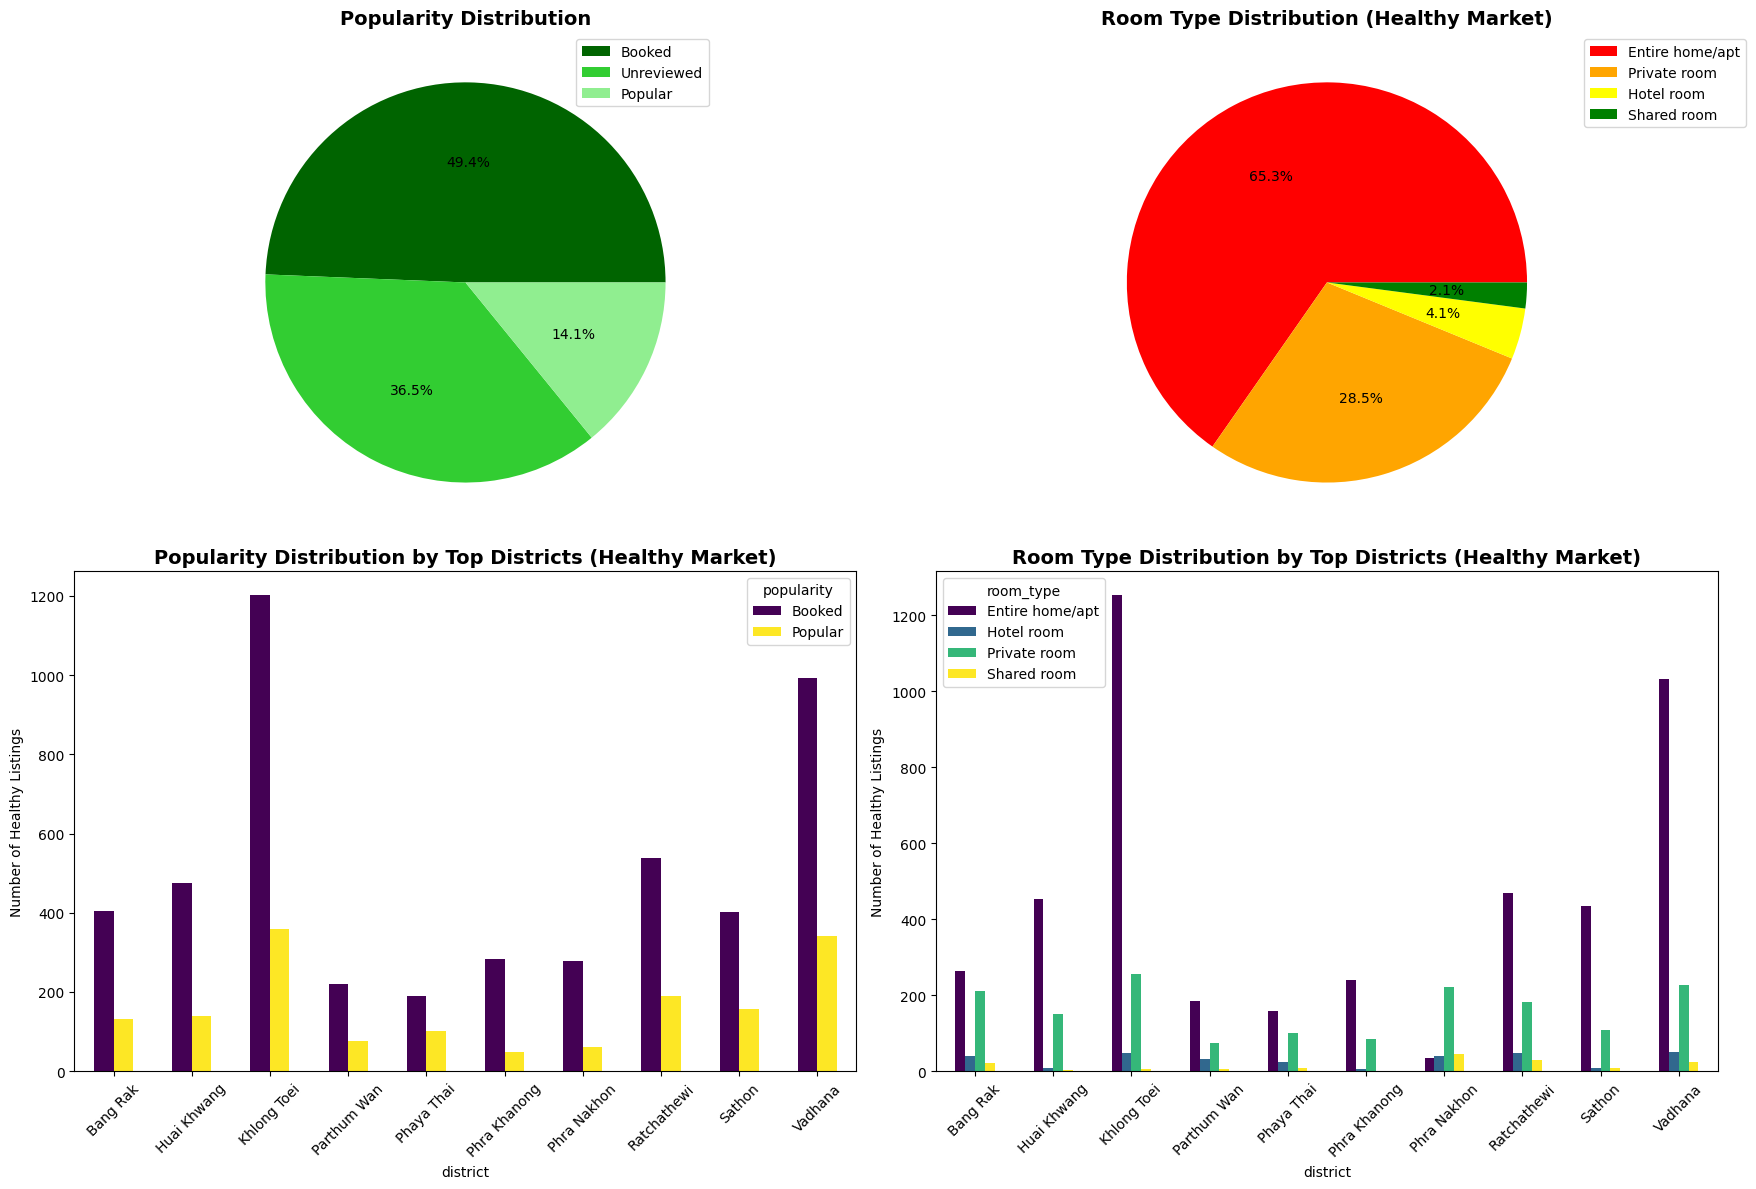

popularity,Booked,Popular
district,,
Khlong Toei,1203,360
Vadhana,992,341
Ratchathewi,539,191
Sathon,403,156
Huai Khwang,474,140
Bang Rak,404,132
Phaya Thai,189,102
Parthum Wan,221,76
Phra Nakhon,279,61


room_type,Entire home/apt,Hotel room,Private room,Shared room
district,,,,
Bang Rak,263,39,212,22
Huai Khwang,454,7,151,2
Khlong Toei,1254,48,255,6
Parthum Wan,185,33,73,6
Phaya Thai,158,23,101,9
Phra Khanong,240,5,85,1
Phra Nakhon,35,40,221,44
Ratchathewi,468,49,183,30
Sathon,435,7,108,9


In [32]:
actual_market=df[(df['availability_365'] >= 1) & (df['availability_365'] <= 365) & (df['number_of_reviews'] > 0)]
popularity=df['popularity'].value_counts().reset_index()
roomtype=actual_market['room_type'].value_counts().reset_index()
top_districts=actual_market['district'].value_counts().head(10).index

#by dist
filtered_data=actual_market[actual_market['district'].isin(top_districts)]
pop_by_district=pd.crosstab(filtered_data['district'], filtered_data['popularity'])
room_by_district=pd.crosstab(filtered_data['district'], filtered_data['room_type'])

#Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
ax1.pie(popularity['count'], autopct='%1.1f%%', colors=color2)
ax1.set_title('Popularity Distribution', fontsize=14, fontweight='bold')
ax1.legend(popularity['popularity'])

ax2.pie(roomtype['count'], autopct='%1.1f%%', colors=color1)
ax2.set_title('Room Type Distribution (Healthy Market)', fontsize=14, fontweight='bold')
ax2.legend(roomtype['room_type'], bbox_to_anchor=(1, 1))

pop_by_district.plot(kind='bar', ax=ax3, colormap='viridis')
ax3.set_title('Popularity Distribution by Top Districts (Healthy Market)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Number of Healthy Listings')
ax3.tick_params(axis='x', rotation=45)

room_by_district.plot(kind='bar', ax=ax4, colormap='viridis')
ax4.set_title('Room Type Distribution by Top Districts (Healthy Market)', fontsize=14, fontweight='bold')
ax4.set_ylabel('Number of Healthy Listings')
ax4.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

display(pop_by_district.sort_values(by='Popular', ascending=False),room_by_district)


## **Analysis Interpretation**
The analysis reveals that the market is predominantly composed of established `Booked` listings, representing `77.3%` of the healthy market. While the `popular` category capture 22.7% of the market. Its also reveals a clear pattern in `Bangkok Airbnb market`, that directly inform investment strategy. Its show that The market has a (`65.3%`) strong preference for `entire home or apartments` over other room types, suggesting that the guest `prioritize privacy and full amenities` during their stays

`Khlong Toei` also stands out as the leading district, having both the highest number of `popular listings (360)` and `booked listings (1203)` with the largest supply of `entire homes or apartment (1,254)` in the market. This aligment between `guest preferences` and `available invetory` make its particularly `attractive for an investment`.


## **Pricing Strategy Quadrant Analysis**
For analyzing pricing strategies accross `Bangkok district`, we will utilize `median price`, `occupancy rates`, and `Potential Annual Revenue` (PAR) to create a strategic map. This approach categorized districts into quadrant based on their price positioning and occupancy performance, revealing distinct market strategies and investment opportunities
Methodology:
- `Price tiers`:District will be classified into budget, mid-range, and premium based on median price distribution
- `Occupancy performance`: High vs Low occupancy realtive to market median
- `Startegy mapping`: Six distinct strategic position indentified from price-occupancy combinations

`Strategy map breakdown`:
| Pricing Tier  | Occupancy Level    | Strategic Label | Business Implication|
| - | - | - | -|
| **Budget**    | **High Occupancy** | *Volume Play*         | Competitive pricing driving high utilization; suitable for mass market appeal |
| **Budget**    | **Low Occupancy**  | *Budget Struggle*     | Low prices failing to attract sufficient demand; indicates market oversaturation or quality issues |
| **Mid-Range** | **High Occupancy** | *Balanced Success*    | Optimal value proposition; sustainable business model with broad appeal|
| **Mid-Range** | **Low Occupancy**  | *Mid-Range Challenge* | Stuck in competitive middle ground; requires differentiation to improve performance|
| **Premium**   | **High Occupancy** | *Premium Success*     | 	Luxury positioning with proven demand; guests value quality and are willing to pay premium|
| **Premium**   | **Low Occupancy**  | *Luxury Struggle*     | Overpriced or mismatched offerings; premium pricing not justified by market demand|

<div class="alert alert-block alert-info"> <b>Investment Insight:</b> This framework helps investors identify districts where pricing strategies align with market demand, reducing risk and maximizing potential returns based on their specific investment goals and risk tolerance. </div>


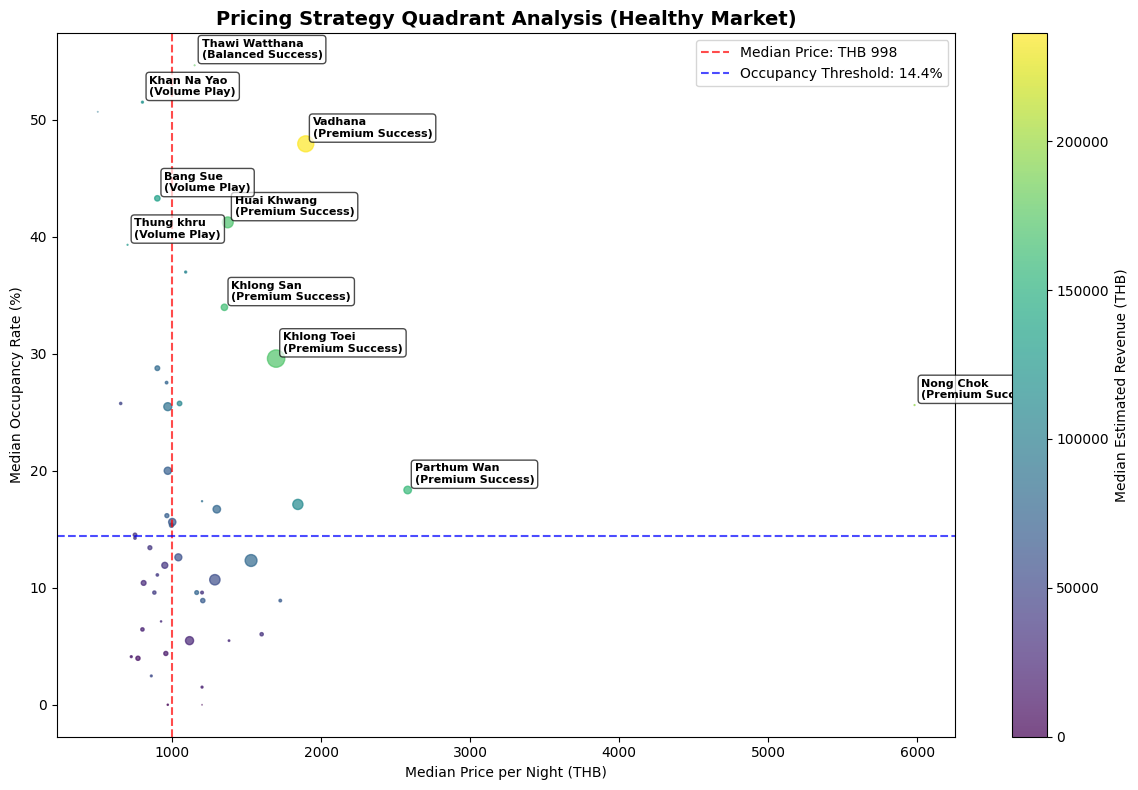


Pricing Strategy Summary:


,price,occupancy_rate_%,PAR,Total_Healthy_Listings,price_tier,occupancy_tier,strategy
district,,,,,,,
Khlong Toei,1697.00,29.59,170800.00,1563,Premium,High Occupancy,Premium Success
Vadhana,1896.00,47.95,236250.00,1333,Premium,High Occupancy,Premium Success
Ratchathewi,1529.00,12.33,79225.00,730,Premium,Low Occupancy,Luxury Struggle
Huai Khwang,1372.50,41.23,169221.50,614,Premium,High Occupancy,Premium Success
Sathon,1286.00,10.68,55972.00,559,Premium,Low Occupancy,Luxury Struggle
Bang Rak,1843.00,17.12,110963.00,536,Premium,High Occupancy,Premium Success
Phra Nakhon,1116.00,5.48,24542.50,340,Mid-Range,Low Occupancy,Mid-Range Challenge
Phra Khanong,970.00,25.48,86460.00,331,Mid-Range,High Occupancy,Balanced Success
Parthum Wan,2580.00,18.36,158100.00,297,Premium,High Occupancy,Premium Success


In [33]:
pricing_strategy = actual_market.groupby('district').agg({
    'price': 'median',
    'occupancy_rate': 'median',
    'PAR': 'median',
    'id': 'count',
}).rename(columns={'id': 'Total_Healthy_Listings'})

pricing_strategy['occupancy_rate'] = pricing_strategy['occupancy_rate'] * 100
pricing_strategy = pricing_strategy.rename(columns={'occupancy_rate': 'occupancy_rate_%'})
pricing_strategy['price_tier'] = pd.qcut(pricing_strategy['price'], 3, labels=['Budget', 'Mid-Range', 'Premium'])
threshold = pricing_strategy['occupancy_rate_%'].median()
pricing_strategy['occupancy_tier'] = np.where(pricing_strategy['occupancy_rate_%'] >= threshold, 'High Occupancy', 'Low Occupancy')

#Startegy Map
strategy_map = {
    ('Budget', 'High Occupancy'): 'Volume Play',
    ('Budget', 'Low Occupancy'): 'Budget Struggle',  
    ('Mid-Range', 'High Occupancy'): 'Balanced Success',
    ('Mid-Range', 'Low Occupancy'): 'Mid-Range Challenge',
    ('Premium', 'High Occupancy'): 'Premium Success',
    ('Premium', 'Low Occupancy'): 'Luxury Struggle'
}
pricing_strategy['strategy'] = pricing_strategy.apply(
    lambda x: strategy_map.get((x['price_tier'], x['occupancy_tier'])), axis=1)

# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(pricing_strategy['price'], pricing_strategy['occupancy_rate_%'], 
           s=pricing_strategy['Total_Healthy_Listings']/10, alpha=0.7, 
           c=pricing_strategy['PAR'], cmap='viridis')

median_price = pricing_strategy['price'].median()
plt.axvline(median_price, color='red', linestyle='--', alpha=0.7, label=f'Median Price: THB {median_price:.0f}')
plt.axhline(threshold, color='blue', linestyle='--', alpha=0.7, label=f'Occupancy Threshold: {threshold:.1f}%')

#labels for top districts
for district in pricing_strategy.nlargest(10, 'PAR').index:
    plt.annotate(f"{district}\n({pricing_strategy.loc[district, 'strategy']})", 
                (pricing_strategy.loc[district, 'price'], pricing_strategy.loc[district, 'occupancy_rate_%']),
                xytext=(5, 5), textcoords='offset points', fontsize=8, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))
    
plt.colorbar(label='Median Estimated Revenue (THB)')
plt.xlabel('Median Price per Night (THB)')
plt.ylabel('Median Occupancy Rate (%)')
plt.title('Pricing Strategy Quadrant Analysis (Healthy Market)', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

#dataframe
print("\nPricing Strategy Summary:")
display(pricing_strategy.sort_values(by='Total_Healthy_Listings', ascending=False).head(15))

## **Analysis Interpretation**
The Pricing strategy analysis reveals clear pattern in how different `Bangkok District` perform based on their price positioning and occupancy levels. The market seperates into distinct strategic groups based on price and occupancy threshold.

**Key Strategic Pattern:**
- `Premium Success listings` (high price, high occupancy) dominate in Khlong Toei, Vadhana, and Huai Khwang, demonstrating that well-managed premium units can sustain high demand.
- `Luxury Struggle`s are seen in Sathon and Ratchathewi, where prices remain high but occupancy lags, reflecting market saturation.
- `Volume Play` segments emerge in outer districts such as Bang Sue and Thung Khru, where low prices maintain occupancy but yield limited profitability.
- `Balanced Success` appears in Phra Khanong and Chatu Chak, which maintain steady returns through moderate pricing and consistent occupancy.

**`Overall`**<br >
this quadrant analysis reveals that successful hosts are those who price according to value perception, not simply by competing on low rates. Districts like Vadhana and Khlong Toei exemplify this principle, sustaining strong occupancy despite premium pricing through quality presentation, prime locations, and strong reviews.


## **Host Business Model Analysis**

To understand how different types of hosts perform across `Bangkok's Districts`, we will analyze four host categories based on their portfolio size: `Individual (1 listing)`, `Small Business (2-5 listings)`, `Professional (6-20 listings)`, and `Enterprise (20+ listings)`. This analysis examines revenue potential, occupancy rates, and market share distribution to `identify the most effective host strategies in each district`.

This approach reveals which host business models dominate specific districts and how scale impacts revenue generation and operational efficiency. The analysis helps identify districts where certain host types have competitive advantages and where new investors might find opportunities based on their preferred operational scale.

Host Business Model Analysis
Analyzing 171 host category-district combinations
Total actual market listings: 9,460


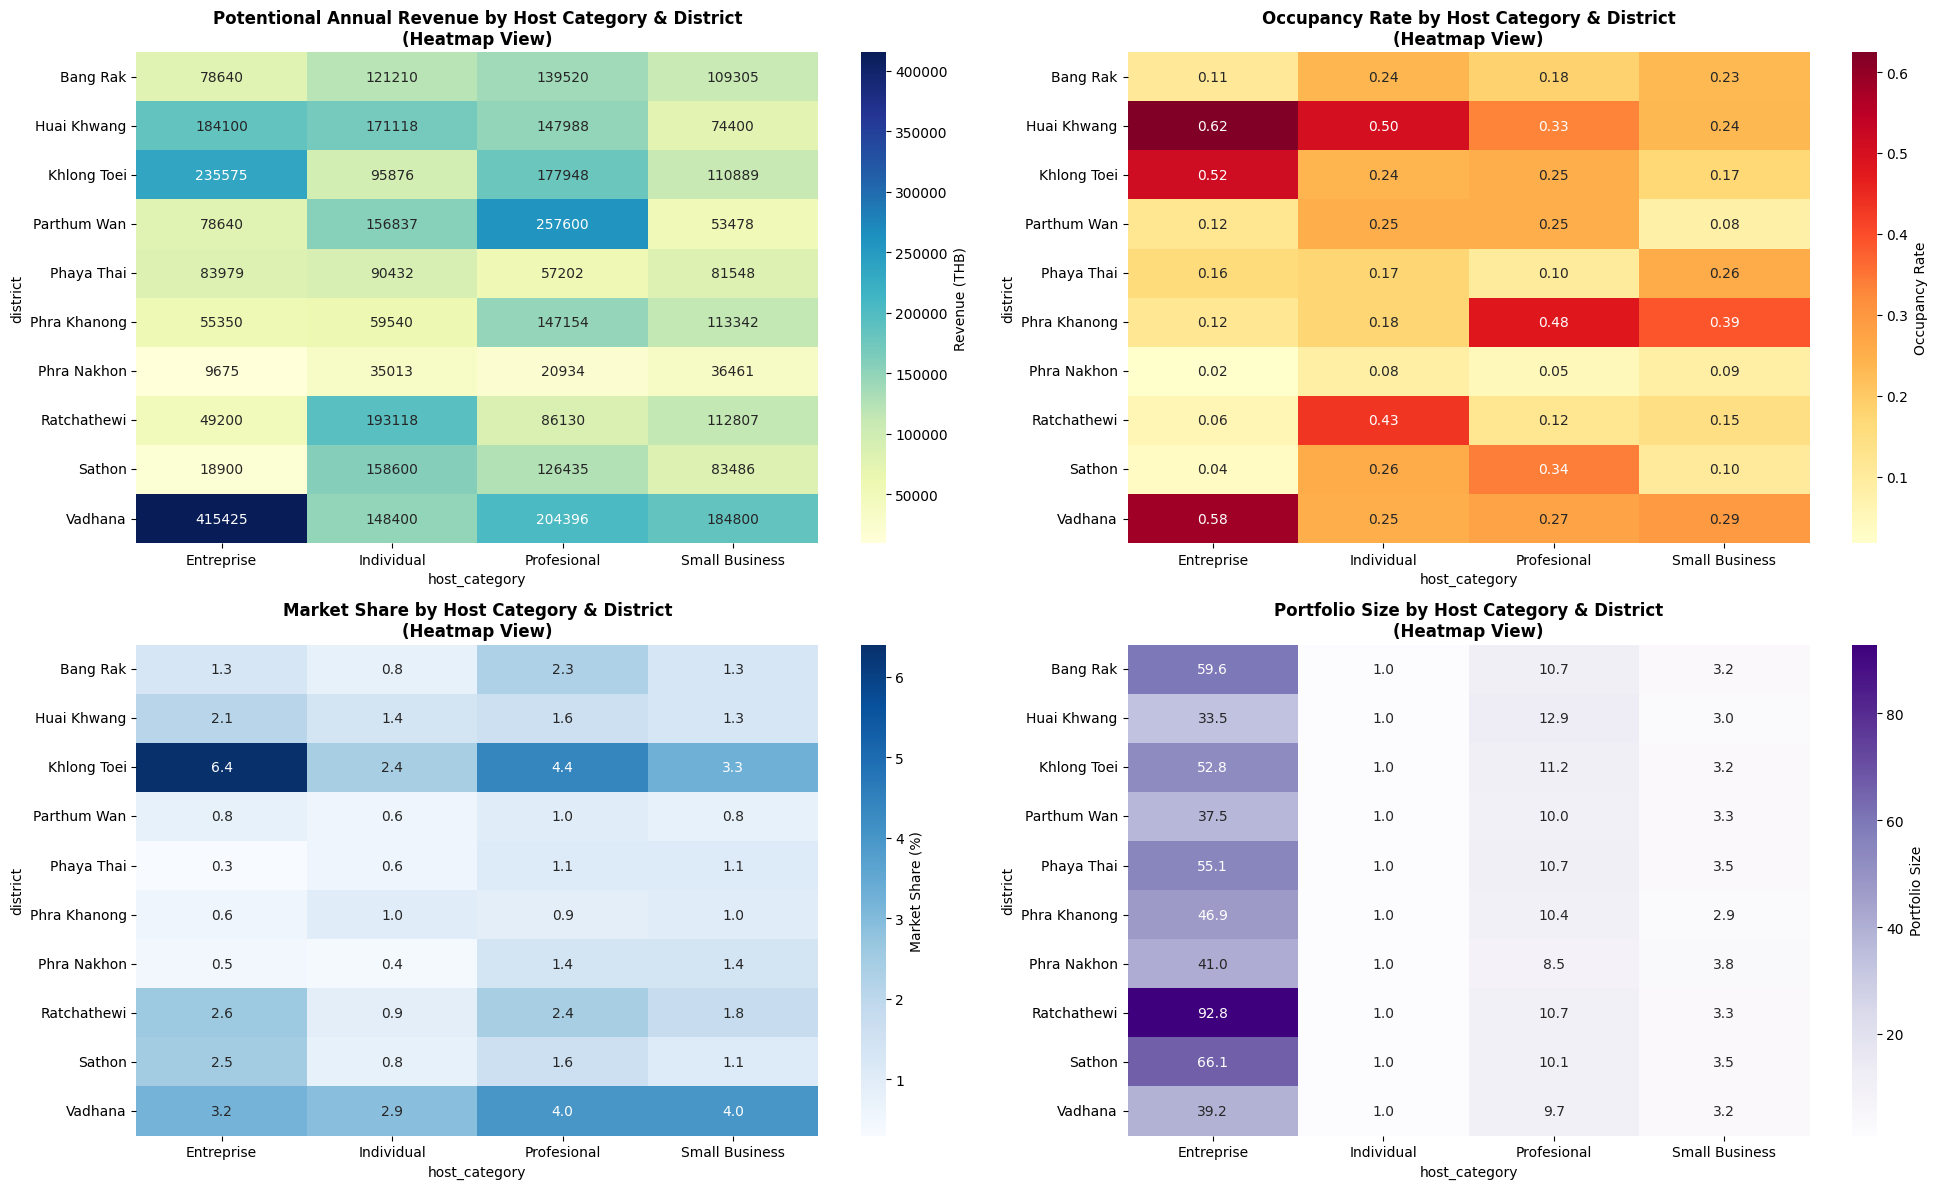

In [ ]:
host_by_dist=actual_market.groupby(['district', 'host_category']).agg({
    'PAR': 'median',
    'occupancy_rate': 'median',
    'price': 'median',
    'calculated_host_listings_count': 'mean',
    'number_of_reviews': 'median',
    'id': 'count'
}).rename(columns={'id': 'num_listings', 'calculated_host_listings_count': 'avg_portfolio_size'}).reset_index()
total_healthy=len(actual_market)
host_by_dist['market_share_pct']=(host_by_dist['num_listings'] / total_healthy * 100).round(1)

print("Host Business Model Analysis")
print("=" * 60)
print(f"Analyzing {len(host_by_dist)} host category-district combinations")
print(f"Total actual market listings: {total_healthy:,}")

#Visualization
fig, axes=plt.subplots(2, 2, figsize=(20, 12))
top_10=actual_market['district'].value_counts().head(10).index
heatmap_data=host_by_dist[host_by_dist['district'].isin(top_10)]

#Revenue Heatmap
revenue_heatmap=heatmap_data.pivot(index='district', columns='host_category', values='PAR')
sns.heatmap(revenue_heatmap, annot=True, fmt='.0f', cmap='YlGnBu', ax=axes[0,0], cbar_kws={'label': 'Revenue (THB)'})
axes[0,0].set_title('Potentional Annual Revenue by Host Category & District\n(Heatmap View)', fontweight='bold')

#Occupancy Heatmap
occupancy_heatmap=heatmap_data.pivot(index='district', columns='host_category', values='occupancy_rate')
sns.heatmap(occupancy_heatmap, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[0,1], cbar_kws={'label': 'Occupancy Rate'})
axes[0,1].set_title('Occupancy Rate by Host Category & District\n(Heatmap View)', fontweight='bold')

#Market Share Heatmap
marketshare_heatmap=heatmap_data.pivot(index='district', columns='host_category', values='market_share_pct')
sns.heatmap(marketshare_heatmap, annot=True, fmt='.1f', cmap='Blues', ax=axes[1,0], cbar_kws={'label': 'Market Share (%)'})
axes[1,0].set_title('Market Share by Host Category & District\n(Heatmap View)', fontweight='bold')

#Portfolio Size Heatmap
portfolio_heatmap=heatmap_data.pivot(index='district', columns='host_category', values='avg_portfolio_size')
sns.heatmap(portfolio_heatmap, annot=True, fmt='.1f', cmap='Purples', ax=axes[1,1], cbar_kws={'label': 'Portfolio Size'})
axes[1,1].set_title('Portfolio Size by Host Category & District\n(Heatmap View)', fontweight='bold')
plt.tight_layout()
plt.show()

## **Analysis Interpretation**
The analysis of  indicates that **enterprise** and **professional** hosts dominate the top-performing districts, particularly in `Vadhana` and `Khlong Toei`. These operators maintain larger portfolios with optimized pricing strategies, achieving higher occupancy and annualized revenue performance. In contrast, individual hosts often manage one or two properties with mixed results. However, in emerging districts like Huai Khwang and Phra Khanong, smaller hosts demonstrate strong adaptability and efficiency, suggesting that entry-level investors can still compete effectively in these growth zones. This pattern reinforces the importance of management sophistication and portfolio scalability. The Bangkok Airbnb market rewards operational consistency, guest experience, and data-driven pricing decisions more than sheer property count.

# **Saving Dataframe to excel**

In [ ]:
# Save multiple DataFrames to different sheets in same file
with pd.ExcelWriter('airbnb_analysis_complete.xlsx') as writer:
    df.to_excel(writer, sheet_name='Raw_Data', index=False)
    health_summary.to_excel(writer, sheet_name='Health_Summary')
    perform_dist.to_excel(writer, sheet_name='Performance_Districts')
    actual_market.to_excel(writer, sheet_name='Actual_Market', index=False)
    
print("Multiple DataFrames saved to airbnb_analysis_complete.xlsx")

Multiple DataFrames saved to airbnb_analysis_complete.xlsx


# **Strategic Insight and Recommendations**

The analysis was conducted to answer a central business question:<br>
`“Which district in Bangkok offers the most viable and profitable opportunity for a new Airbnb investment, balancing potential returns with manageable risk?”`

Through a combination of **`market size assessment`**, **`pricing strategy quadrant analysis`**, **`popularity and room-type distribution`**, and **`host business model analysis`**, several key insights emerged that inform the investment and strategic priorities for Airbnb hosts and investors. The findings reveal that the Bangkok Airbnb market is  `healthy (59.7%)` of overall Bangkok market , characterized by listings that have successfully received reviews, indicating active host engagement and real market demand. Within this healthy subset, the majority of listings fall under the “Booked” category, suggesting that the competitive market is functioning efficiently with steady occupancy performance. Moreover, a strong guest preference for entire homes or apartments (constituting approximately 65.3% of listings) highlights that travelers in Bangkok primarily value privacy and self-contained amenities over shared accommodation experiences.

**`1. Best Overall Investment District`** - **`Vadhana`**<br>
Among all analyzed districts, **Vadhana** stands out as the most strategically favorable location for Airbnb investment. The district exhibits a mature yet dynamic market characterized by **strong demand, healthy pricing, and consistent performance across multiple metrics**. Vadhana’s attractiveness lies in its high occupancy efficiency, premium pricing, and strong host ecosystem, which rarely achieved by other districts. These characteristics make it ideal for investors seeking both stability and profitability.

**Key Insights:**
- **Highest healthy-listing ratio:** above 0.62, indicating strong engagement from active and well-performing hosts.
- **Strong occupancy rate:** 47.9%, reflecting sustained guest demand and high booking turnover.
- **Premium nightly rate:** ฿1,896, placing the district in the upper segment of the Bangkok market.
- **Potential Annual Revenue (PAR):** approximately ฿236,000—among the highest across all districts.
- **Balanced host ecosystem:** a mix of professional and small-scale operators fostering a competitive yet stable environment.

**`Strategic Interpretation:`**
Vadhana represents the “Premium Success” model—suitable for mid- to high-capital investors aiming for sustainable yield in a mature market. Although moderate saturation exists, Vadhana’s brand momentum and guest trust sustain profitability, making it the most balanced trade-off between risk and return.

**`2. Runner-Up District`** - **`KhlongToei`**<br>
**Khlong Toei** ranks as the second most promising district, combining scale, diversity, and stability. It serves as Bangkok’s largest Airbnb hub, accommodating a wide range of property types and host profiles. While slightly trailing Vadhana in pricing and occupancy, Khlong Toei compensates with market depth and strong booking liquidity, providing an appealing environment for scalable investments.
Key Insights:

- Largest booked and healthy inventory: 1,203 active listings.
- Stable PAR: approximately ฿170,000, ensuring dependable revenue flow.
- Broad host participation: combination of professional enterprises and small business operators.
- Moderate competition: high listing density increases market liquidity but introduces pricing pressure.

**`Strategic Interpretation:`**
Khlong Toei supports a “Premium Success” strategy for mid- to high-capital investors who value long-term stability and scale. The district’s depth ensures consistent bookings, but differentiation—through superior guest experience or niche branding—is key to outperforming competitors.

**`3. Secondary Stakeholder Implications`**<br>
While the primary focus is on hosts and investors, the findings hold significant implications for Airbnb’s platform strategy and guest experience.

**For Airbnb as a Platform:**<br>
The platform can play a proactive role in rebalancing market performance by supporting weaker districts through reactivation programs for inactive listings, targeted promotions, and host development initiatives. By redistributing attention away from saturated premium zones like Vadhana and Khlong Toei, Airbnb can enhance overall market diversity and resilience.

**For Guests:**<br>
Guests demonstrate a clear preference for private, self-contained accommodations, evidenced by the dominance of entire homes and apartments. Districts such as Huai Khwang and Phra Khanong align with this preference, offering affordable comfort and authentic local experiences, which can enrich guest satisfaction and encourage repeat bookings.


**`4. Final Startegic`**<br>
1. Which district to invest in?
2. What type of properties perform best?
3. What price level should be set?
4. What business model yields sustainable performance?
5. How does ROI compare across scenarios?


# **Strategic Insight and Recommendations**

The analysis was conducted to answer a central business question:<br>
`“Which district in Bangkok offers the most viable and profitable opportunity for a new Airbnb investment, balancing potential returns with manageable risk?”`

Through a combination of **`market size assessment`**, **`pricing strategy quadrant analysis`**, **`popularity and room-type distribution`**, and **`host business model analysis`**, several key insights emerged that inform the investment and strategic priorities for Airbnb hosts and investors. The findings reveal that the Bangkok Airbnb market is  `healthy (59.7%)` of overall Bangkok market , characterized by listings that have successfully received reviews, indicating active host engagement and real market demand. Within this healthy subset, the majority of listings fall under the “Booked” category, suggesting that the competitive market is functioning efficiently with steady occupancy performance. Moreover, a strong guest preference for entire homes or apartments (constituting approximately 65.3% of listings) highlights that travelers in Bangkok primarily value privacy and self-contained amenities over shared accommodation experiences.

**`1. Which District to Invest In?`**<br>
Primary Recommendation: **Vadhana**<br>
**Vadhana** is identified as the most strategically viable investment district based on consistent performance across key indicators:

- **Healthy-listing ratio:** above 0.62, showing a high concentration of active, reviewed, and profitable listings.
- **Occupancy rate:** 47.9%, among the highest in Bangkok.
- **Average nightly price:** ฿1,896, positioning Vadhana in the mid-to-premium pricing tier.
- **Potential Annual Revenue (PAR):** approximately ฿236,000 per listing, one of the best-performing districts.
- **Balanced host composition:** a mix of professional and small-scale hosts, ensuring market depth and stability.

- Runner-up: **Khlong Toei**
Khlong Toei follows closely with a large active listing base (1,203 booked listings) and a PAR of around ฿170,000, offering scalability and liquidity for investors seeking a larger portfolio approach.

**`2. What Type of Properties Perform Best?`**<br>
Recommended Property Type: **Entire Homes / Apartments (Entire Units)**
- Represent about 65.3% of Bangkok’s Airbnb listings.
- Deliver higher occupancy and revenue than shared or private-room categories.
- Align with guest preferences for privacy and convenience, especially among international travelers.
- Enable professional presentation and full amenity offerings, driving stronger reviews and repeat bookings.

**`3. What Price Level Should Be Set?`**<br>
**Vadhana (Primary District):**
- Recommended price range: ฿1,800 – ฿2,000 per night
- This range aligns with the district’s market average (฿1,896) and optimizes positioning within the Premium Success - cluster, balancing pricing and booking volume.
- Implement dynamic pricing to adjust for weekdays, weekends, seasonal trends, and local events to sustain demand.
<br>

**Khlong Toei (Secondary District):**
- Suggested range: ฿1,400 – ฿1,800 per night
- Effective for investors targeting broader occupancy and longer booking cycles.
- Emerging Districts (Huai Khwang, Phra Khanong):

Competitive entry pricing between ฿1,200 – ฿1,500 per night, appealing to budget-conscious yet quality-seeking guests.

**`4. What Business Model Yields Sustainable Performance?`**<br>
**Recommended Models:**
- Professional Hosting Model <br>
    Full service management (PMS, automated pricing, cleaning contracts, professional photography, and 24/7 support). Ideal for multi-property or investor portfolios.
- Hybrid Hosting Model <br>
    owner-managed with outsourced daily operations (cleaning, check-in, co-host management). Best for small to mid-cap investors optimizing operational efficiency without full staffing costs.

**`Consolidated Final Recommendation`**
- District: Vadhana (primary); Khlong Toei (secondary for scalability).
- Property Type: Entire apartments or condominiums.
- Pricing Strategy: ฿1,800–฿2,000 nightly rate (dynamic pricing recommended).
- Business Model: Professional or hybrid hosting with PMS, automated pricing, and standardized guest service.

**`Secondary Stakeholder Implications`**<br>
While the primary focus is on hosts and investors, the findings hold significant implications for Airbnb’s platform strategy and guest experience.

**For Airbnb as a Platform:**<br>
The platform can play a proactive role in rebalancing market performance by supporting weaker districts through reactivation programs for inactive listings, targeted promotions, and host development initiatives. By redistributing attention away from saturated premium zones like Vadhana and Khlong Toei, Airbnb can enhance overall market diversity and resilience.

**For Guests:**<br>
Guests demonstrate a clear preference for private, self-contained accommodations, evidenced by the dominance of entire homes and apartments. Districts such as Huai Khwang and Phra Khanong align with this preference, offering affordable comfort and authentic local experiences, which can enrich guest satisfaction and encourage repeat bookings.



